In [1]:
import collections
import math
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

sns.set()

# Type of the graph


In [2]:
actors_agg_adj = np.load("sparse_agg_actor_adj.npy")
actors_agg_df = pd.read_pickle("actors_agg_df.pkl")
actors_graph = nx.from_numpy_matrix(actors_agg_adj)

It is not a regular graph because nodes does not have the same degree as seen below:

In [3]:
# regular graph
for node, degree in sorted(actors_graph.degree(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"node {node}: degree: {degree}")

node 563: degree: 1182
node 1454: degree: 1149
node 362: degree: 1123
node 475: degree: 1100
node 1725: degree: 1090


In [4]:
# degree list with node_id as index
degree_list = [degree for node, degree in actors_graph.degree()]

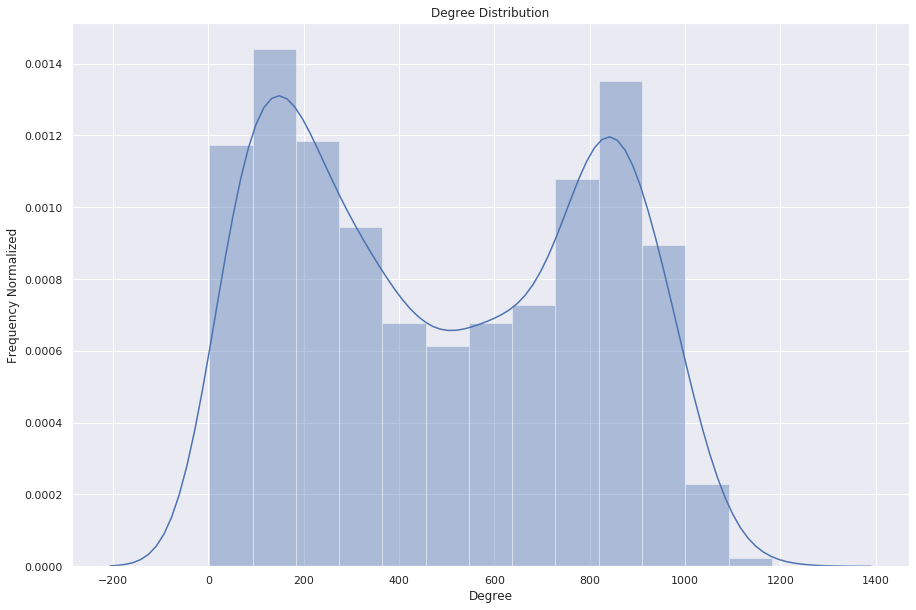

In [5]:

degree_sequence = sorted([d for n, d in actors_graph.degree()], reverse=True)

plt.figure(figsize=(15, 10))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency Normalized")
ax = sns.distplot(degree_sequence, kde=True)
plt.savefig("plots/degree_distribution.pdf")

Other graphs type is the scale free or Power law graph, however looking at the degree distribution clearly we can see that it is not a power-law 

Looking at the degree distribution we can see that graph is a random graph

In [6]:
# Average Degree
average_degree = sum([degree for node, degree in actors_graph.degree()]) / len(
    actors_graph.nodes
)
print(average_degree)

492.74987316083207


In [7]:
math.log(len(actors_graph.degree())) / math.log(average_degree)

1.2235958453164277

In [8]:
# Test Small World
# Average clustering coefficient
clustering_coefficient = nx.average_clustering(actors_graph)
mean_shortest_path = nx.average_shortest_path_length(actors_graph)

# Erdős–Rényi to test
n = len(actors_graph.nodes)
m = actors_graph.size()
p = 2 * m / (n * (n - 1))
G_er = nx.erdos_renyi_graph(n, p)
clustering_coefficient_er = nx.average_clustering(G_er)
mean_shortest_path_er = nx.average_shortest_path_length(actors_graph)

In [9]:
clustering_coefficient / clustering_coefficient_er

2.40297800586777

In [10]:
mean_shortest_path / mean_shortest_path_er

1.0

Thus, it means that the network is a small world, due to the comparison between network statistics like clustering coefficient and the mean shortest path. The comparison is done with a similar Erdős–Rényi generated network. Small networks should have some spatial structure, that is reflected on a bigger clustering coefficient.

# Properties of nodes

In [11]:
# Average clustering coefficient
print(clustering_coefficient)

0.6016007434629211


In [12]:
# Degree centrality sorted
degree_centrality = nx.degree_centrality(actors_graph)
sorted_centrality = sorted(
    degree_centrality.items(), key=lambda kv: kv[1], reverse=True
)

In [13]:
# Actors that have more dense connections
for node_id, centrality in sorted_centrality[:5]:
    print(actors_agg_df.loc[node_id, "actors"], centrality)

Eric Bogosian 0.6
Patrick Dempsey 0.583248730964467
Claire Danes 0.5700507614213198
Diego Luna 0.5583756345177665
Shia LaBeouf 0.5532994923857868


In [14]:
# Actors that does not have dense connections
for node_id, centrality in sorted_centrality[-5:]:
    print(actors_agg_df.loc[node_id, "actors"], centrality)

Karra Elejalde 0.0040609137055837565
Ellar Coltrane 0.003553299492385787
Roma Downey 0.003553299492385787
Ivan Dixon 0.0015228426395939086
Todd McFarlane 0.0010152284263959391


In [15]:
# hubs
degrees_np = np.array(degree_list)

# nodes that have degree greater than average
indexes = np.where(degrees_np > average_degree)[0]
print(f"Actor's hubs: number {len(indexes)}")
actors_agg_df.loc[np.array(indexes), "actors"]

Actor's hubs: number 958


actor_id
1                    50 Cent
5              Aaron Eckhart
7                 Aaron Paul
8             Aaron Stanford
9       Aaron Taylor-Johnson
                ...         
1962            Zachary Levi
1965              Zhang Ziyi
1966               Zoe Kazan
1968             Zoe Saldana
1970         Zooey Deschanel
Name: actors, Length: 958, dtype: object